In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from PrepareDataset import PrepareDataset

In [46]:
data = pd.read_csv('dataset.csv', header=0)

In [49]:
dataset = PrepareDataset(data)
dataset = dataset.early_preparation()
dataset = dataset.set_rows_to_zeros()
dataset = dataset.split_power()
dataset = dataset.standard_scaled_dataset()

AttributeError: 'PrepareDataset' object has no attribute 'standard_scaled_dataset'

In [ ]:
train_dataset = dataset.train()
val_dataset = dataset.val()
test_dataset = dataset.test()

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer=Adam(0.000125), loss='mse')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

In [ ]:
model.fit(train_dataset[0], train_dataset[1], epochs=5000, validation_data=(val_dataset[0], val_dataset[1]), callbacks=[early_stopping], batch_size=8)

Epoch 1/5000
819/819 [==============================] - 1s 1ms/step - loss: 1309685181317120.0000 - val_loss: 2402589404561408.0000
Epoch 2/5000
819/819 [==============================] - 1s 896us/step - loss: 1309614717009920.0000 - val_loss: 2402340028022784.0000
Epoch 3/5000
819/819 [==============================] - 1s 924us/step - loss: 1309296755212288.0000 - val_loss: 2401522373623808.0000
Epoch 4/5000
819/819 [==============================] - 1s 842us/step - loss: 1308515071164416.0000 - val_loss: 2399809486979072.0000
Epoch 5/5000
819/819 [==============================] - 1s 824us/step - loss: 1307076793991168.0000 - val_loss: 2396890788265984.0000
Epoch 6/5000
819/819 [==============================] - 1s 819us/step - loss: 1304767443763200.0000 - val_loss: 2392429390987264.0000
Epoch 7/5000
819/819 [==============================] - 1s 832us/step - loss: 1301404350152704.0000 - val_loss: 2386141290430464.0000
Epoch 8/5000
819/819 [==============================] - 1s 840us

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(test_dataset)[:,0]

30/30 [==============================] - 0s 608us/step


In [ ]:
test_power_to_mega = test_dataset[1]/(10**6)
predictions_to_mega = predictions/(10**6)

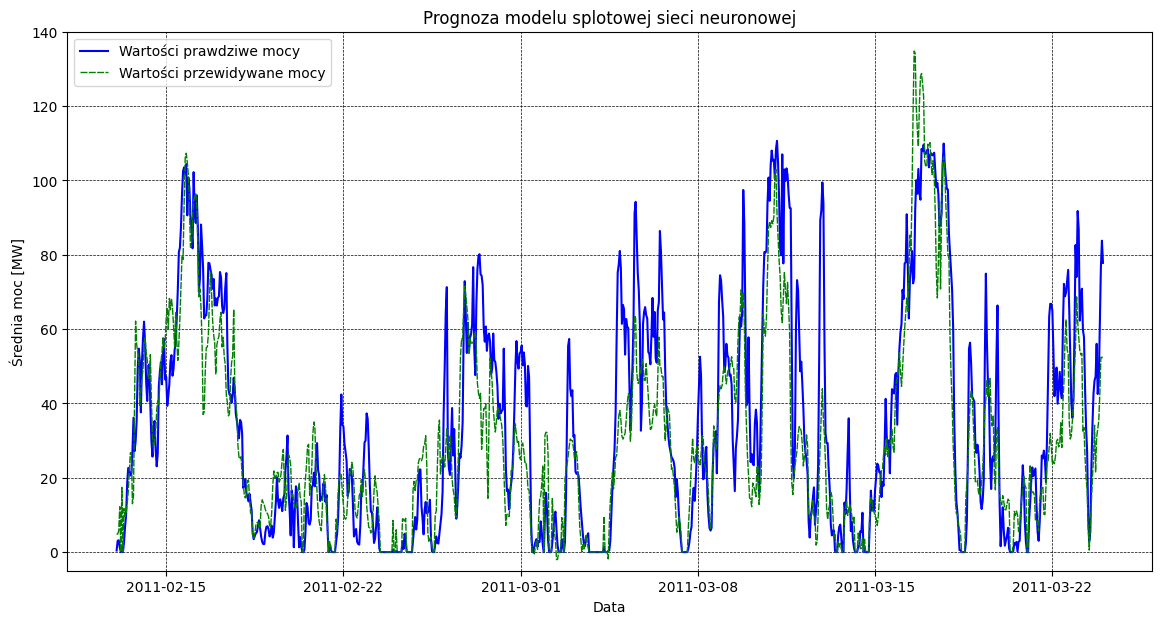

In [ ]:
plt.style.use('default')
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], test_power_to_mega, color='blue', label='Wartości prawdziwe mocy', linewidth=1.5)
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], predictions_to_mega, color='green', linestyle=(0, (5, 1)), label='Wartości przewidywane mocy', linewidth=1)
fig = plt.gcf()
fig = fig.set_size_inches(14,7)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Prognoza modelu splotowej sieci neuronowej')
plt.xlabel('Data')
plt.ylabel('Średnia moc [MW]')
plt.ylim([-5, 140])
plt.grid(color='k', linewidth=0.5, linestyle='--')
plt.legend(loc='best')
plt.show()

In [ ]:
print(f'R^2 score: {round(r2_score(test_dataset[1], predictions), 3)}')


R^2 score: 0.754
